In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from ipywidgets import IntProgress
from IPython.display import display

In [2]:
class Rede_Neural():
    
    ##Inicializando os elementos da rede neural
    def __init__(self, n_entradas = 2, n_camadas = 3, n_saidas = 1):
        
        ## Arquitetura da rede neural
        self.n_entradas = n_entradas
        self.n_camadas = n_camadas
        self.n_saidas = n_saidas
        
        ## Inicialização das matrizes de pesos
        ## Distribuição U(-1,1]
        self.w_1 = np.random.uniform(low = -1, high = 1, size = (self.n_camadas, self.n_entradas))
        self.w_2 = np.random.uniform(low = -1, high = 1, size = (self.n_saidas, self.n_camadas))
        
        ## Acréscimo do viés (bias)
        ## Vies é aleatório com distribuição U(-0.5, 0.5)
        self.bias_h = np.random.rand(self.n_camadas, 1) - 0.5
        self.bias_o = np.random.rand(self.n_saidas, 1) - 0.5
        
        ## Função de ativação Sigmoide
        self.sig = lambda x: 1/(1+np.exp(-x))
        
        ## Derivada da função sigmoide
        self.dsig = lambda y: y*(1.0-y)
        
        ## Guardando o erro ao longo do treinamento
        self.erros = []
    
    ## Algoritmo backpropragation de aprendizado supervisionado para redes neurais multi-layer perceptron
    
    def fit(self, x_treinamento, y_alvos, taxa_aprendizado = 0.1, epocas = 1000, tol = 0):
        
        ## Barra de progresso
        barra = IntProgress(min = 0, max = epocas)
        print("Progresso do treinamento: ")
        display(barra)
        
        ##Treina enquanto há erro
        haErro = True
        i = 0
        
        while(i < epocas) and haErro:
            for x_tr, y_alvo in zip(x_treinamento, y_alvos):
                
                ## Ajustando a dimensao da entrada
                x = np.array(x_tr, ndmin=2).T
                
                ## Etapa forward
                # Entrada --> Camada Oculta
                saida_oculta = self.sig(np.add((np.dot(self.w_1, x)), self.bias_h))
                # Camada oculta --> camada de saida
                y_previsto = self.sig(np.add((np.dot(self.w_2, saida_oculta)), self.bias_o))
                
                ### Calculo do erro a cada época
                erro = y_alvo - y_previsto
                
                ## Etapa backwards
                
                ### Calculo do erro na camada de saída
                erro_oculto = np.dot(self.w_2.T, erro)
                ## Ajuste dos pesos na camada de saída, no sentido oposto ao gradiente descendente
                ## Observe o delta w
                self.w_2 += taxa_aprendizado*(np.dot((erro*(self.dsig(y_previsto))), np.transpose(saida_oculta)))
                ## Ajustando o vies da camada de saída
                self.bias_o += taxa_aprendizado*(erro*(self.dsig(y_previsto)))
                
                ### Considera apenas uma camada oculta
                ## Calculo do erro na camada oculta
                self.w_1 += taxa_aprendizado*(np.dot((erro_oculto*(self.dsig(saida_oculta))), np.transpose(x)))
                # Ajustando o vies na camada oculta
                self.bias_h += taxa_aprendizado*(erro_oculto*(self.dsig(saida_oculta)))
                
            ## Erro medio quadratico a cada época
            erroEpoca = mean_squared_error(y_alvo,y_previsto)
            self.erros.append(erroEpoca)
            
            ## Atualiza a barra de progresso
            barra.value += 1
            
            if (erroEpoca <= tol):
                haErro = False
            i += 1
        
        
    ## Realiza a etapa forward da rede e aplica a funcao degrau com theta = 0.5 para determinar a classe
    def predict(self, x_con):
       
        #Converter a entradas para a matriz 2d.
        x = np.array(x_con, ndmin=2).T
        
        #Calculando a saída dos neurônios da camada oculta.
        saida_oculta = self.sig(np.add((np.dot(self.w_1, x)), self.bias_h))
        #Calculando a saída final da rede neural.
        saida_final = self.sig(np.add((np.dot(self.w_2, saida_oculta)), self.bias_o))
        
        
        return [1 if x >= 0.5 else 0 for x in saida_final]
                
                


### Situação 1 - XOR bidimensional com 10 mil  épocas

In [11]:
## Para reproduzir os exemplos iguais aos que fiz, utilize a linha a seguir
## Caso queira testar aletoriamente, basta removê-la
np.random.seed(42)

## Instancia da rede neural
rn = Rede_Neural()

### Problema XOR bidimensional
# Atributos preditores
X_train = np.array([[0,1], [1,0], [1,1], [0,0]])
# Atributo alvo
y_train = np.array([[1], [1], [0], [0]])

## Treinamento da rede
rn.fit(X_train, y_train, taxa_aprendizado = 0.4, epocas = 100)

Progresso do treinamento: 


IntProgress(value=0)

## Visualização do Aprendizado

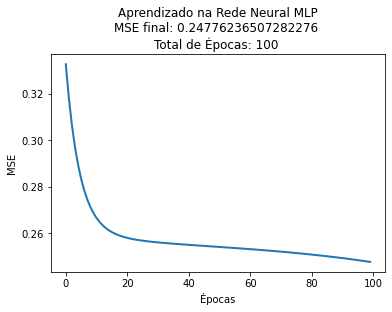

In [12]:
## Plotando o MSE a cada época
plt.title("Aprendizado na Rede Neural MLP\nMSE final: {0} \nTotal de Épocas: {1} ".format(rn.erros[-1],len(rn.erros)))
plt.plot(rn.erros, '-', linewidth=2)
plt.ylabel("MSE")
plt.xlabel("Épocas")
plt.show()

## Testando a rede neural para o problema

In [13]:
# Efetuando previsões com a rede neural
for(x, y_true) in zip(X_train, y_train):
    print("Entrada: ", x, "Saída prevista: ", rn.predict(x), "Saída desejada: ", y_true)

Entrada:  [0 1] Saída prevista:  [0] Saída desejada:  [1]
Entrada:  [1 0] Saída prevista:  [1] Saída desejada:  [1]
Entrada:  [1 1] Saída prevista:  [0] Saída desejada:  [0]
Entrada:  [0 0] Saída prevista:  [0] Saída desejada:  [0]


### Situação 2 - XOR bidimensional e tolerância ao erro

In [15]:
## Instancia uma nova rede neural, com novos pesos
np.random.seed(12)
rn = Rede_Neural()

## Problema XOR dimensional

# Atributos preditores
X_train = np.array([[1,1],[1,0],[0,1],[0,0]])

# Atributo alvo
y_train = np.array([[0], [1], [1], [0]])

## Treinamento da rede
rn.fit(X_train, y_train, taxa_aprendizado = 0.4, epocas = 100, tol = 10**-3)

Progresso do treinamento: 


IntProgress(value=0)

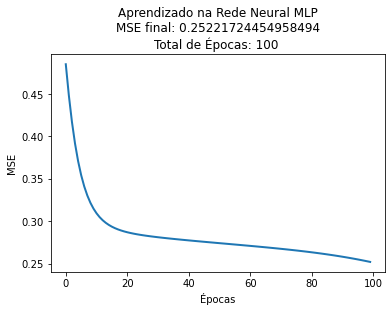

In [16]:
## Plotando o MSE a cada época
plt.title("Aprendizado na Rede Neural MLP\nMSE final: {0}\nTotal de Épocas: {1} ".format(rn.erros[-1],len(rn.erros)))
plt.plot(rn.erros, '-',linewidth=2)
plt.ylabel("MSE")
plt.xlabel("Épocas")
plt.show()

In [17]:
# Efetuando previsões com a rede neural
for (x,y_true) in zip(X_train,y_train):
    print("Entrada: ",x, "Saída prevista: ",rn.predict(x), "Saída desejada :",y_true)

Entrada:  [1 1] Saída prevista:  [0] Saída desejada : [0]
Entrada:  [1 0] Saída prevista:  [0] Saída desejada : [1]
Entrada:  [0 1] Saída prevista:  [1] Saída desejada : [1]
Entrada:  [0 0] Saída prevista:  [0] Saída desejada : [0]


## Situação 3 - XOR bidimensional com arquitetura diferente

In [19]:
np.random.seed(42)

## Instancia a rede neural
rn = Rede_Neural(n_entradas = 2, n_camadas = 100, n_saidas=1)

### Problema XOR dimensional
# Atributos preditores
X_train = np.array([[1,1],[1,0],[0,1],[0,0]])
# Atributo alvo
y_train = np.array([[0],[1],[1],[0]])

## Treinamento da rede
rn.fit(X_train, y_train,taxa_aprendizado = 0.4, epocas = 100, tol = 10**(-2))

Progresso do treinamento: 


IntProgress(value=0)

In [20]:
## Provando que há 100 unidades neuronais na 1a. camada oculta
assert len(rn.w_1) == 100

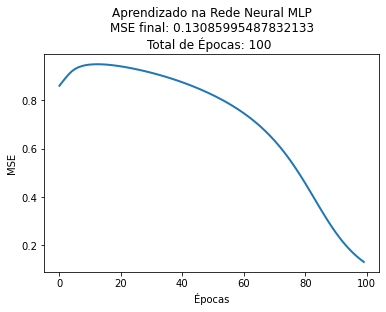

In [21]:
## Plotando o MSE a cada época
plt.title("Aprendizado na Rede Neural MLP\nMSE final: {0}\nTotal de Épocas: {1} ".format(rn.erros[-1],len(rn.erros)))
plt.plot(rn.erros, '-',linewidth=2)
plt.ylabel("MSE")
plt.xlabel("Épocas")
plt.show()

In [22]:
# Efetuando previsões com a rede neural
for (x,y_true) in zip(X_train,y_train):
    print("Entrada: ",x, "Saída prevista: ",rn.predict(x), "Saída desejada :",y_true)

Entrada:  [1 1] Saída prevista:  [0] Saída desejada : [0]
Entrada:  [1 0] Saída prevista:  [1] Saída desejada : [1]
Entrada:  [0 1] Saída prevista:  [1] Saída desejada : [1]
Entrada:  [0 0] Saída prevista:  [0] Saída desejada : [0]


## Situação 4 - Problema AND bidimensional, linearmente separável

In [24]:
np.random.seed(42)

## Instancia a rede neural
rn = Rede_Neural(n_entradas = 2, n_camadas = 3, n_saidas=1)

### Problema XOR dimensional
# Atributos preditores
X_train = np.array([[1,1],[1,0],[0,1],[0,0]])
# Atributo alvo
y_train = np.array([[1],[0],[0],[0]])

## Treinamento da rede
rn.fit(X_train, y_train,taxa_aprendizado = 0.1, epocas = 100)

Progresso do treinamento: 


IntProgress(value=0)

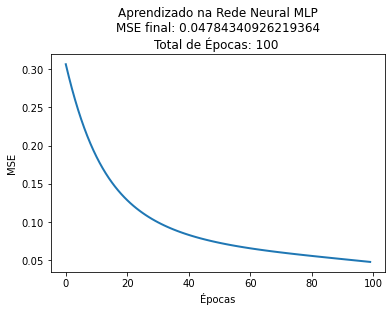

In [25]:
## Plotando o MSE a cada época
plt.title("Aprendizado na Rede Neural MLP\nMSE final: {0}\nTotal de Épocas: {1} ".format(rn.erros[-1],len(rn.erros)))
plt.plot(rn.erros, '-',linewidth=2)
plt.ylabel("MSE")
plt.xlabel("Épocas")
plt.show()

In [26]:
# Efetuando previsões com a rede neural
for (x,y_true) in zip(X_train,y_train):
    print("Entrada: ",x, "Saída prevista: ",rn.predict(x), "Saída desejada :",y_true)

Entrada:  [1 1] Saída prevista:  [0] Saída desejada : [1]
Entrada:  [1 0] Saída prevista:  [0] Saída desejada : [0]
Entrada:  [0 1] Saída prevista:  [0] Saída desejada : [0]
Entrada:  [0 0] Saída prevista:  [0] Saída desejada : [0]
